In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv("wineQuality.csv")

df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
742,6.5,0.615,0.0,1.9,0.065,9.0,18.0,0.9972,3.46,0.65,9.2,5


In [17]:
df = df.rename(columns={'fixed acidity': 'Fixed Acidity', 'volatile acidity': 'Volatile Acidity', 'citric acid': 'Citric Acid',
                        'residual sugar': 'Residual Sugar', 'chlorides': 'Chlorides', 'free sulfur dioxide': 'Free Sulfur Dioxide', 'total sulfur dioxide':'Total Sulfur Dioxide',
                        'density': 'Density', 'pH': 'pH', 'sulphates': 'Sulphates', 'alcohol': 'Alcohol', 'quality': 'Quality'})
df

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         1599 non-null   float64
 1   Volatile Acidity      1599 non-null   float64
 2   Citric Acid           1599 non-null   float64
 3   Residual Sugar        1599 non-null   float64
 4   Chlorides             1599 non-null   float64
 5   Free Sulfur Dioxide   1599 non-null   float64
 6   Total Sulfur Dioxide  1599 non-null   float64
 7   Density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   Sulphates             1599 non-null   float64
 10  Alcohol               1599 non-null   float64
 11  Quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Fixed Acidity           False
Volatile Acidity        False
Citric Acid             False
Residual Sugar          False
Chlorides               False
Free Sulfur Dioxide     False
Total Sulfur Dioxide    False
Density                 False
pH                      False
Sulphates               False
Alcohol                 False
Quality                 False
dtype: bool

In [19]:
df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

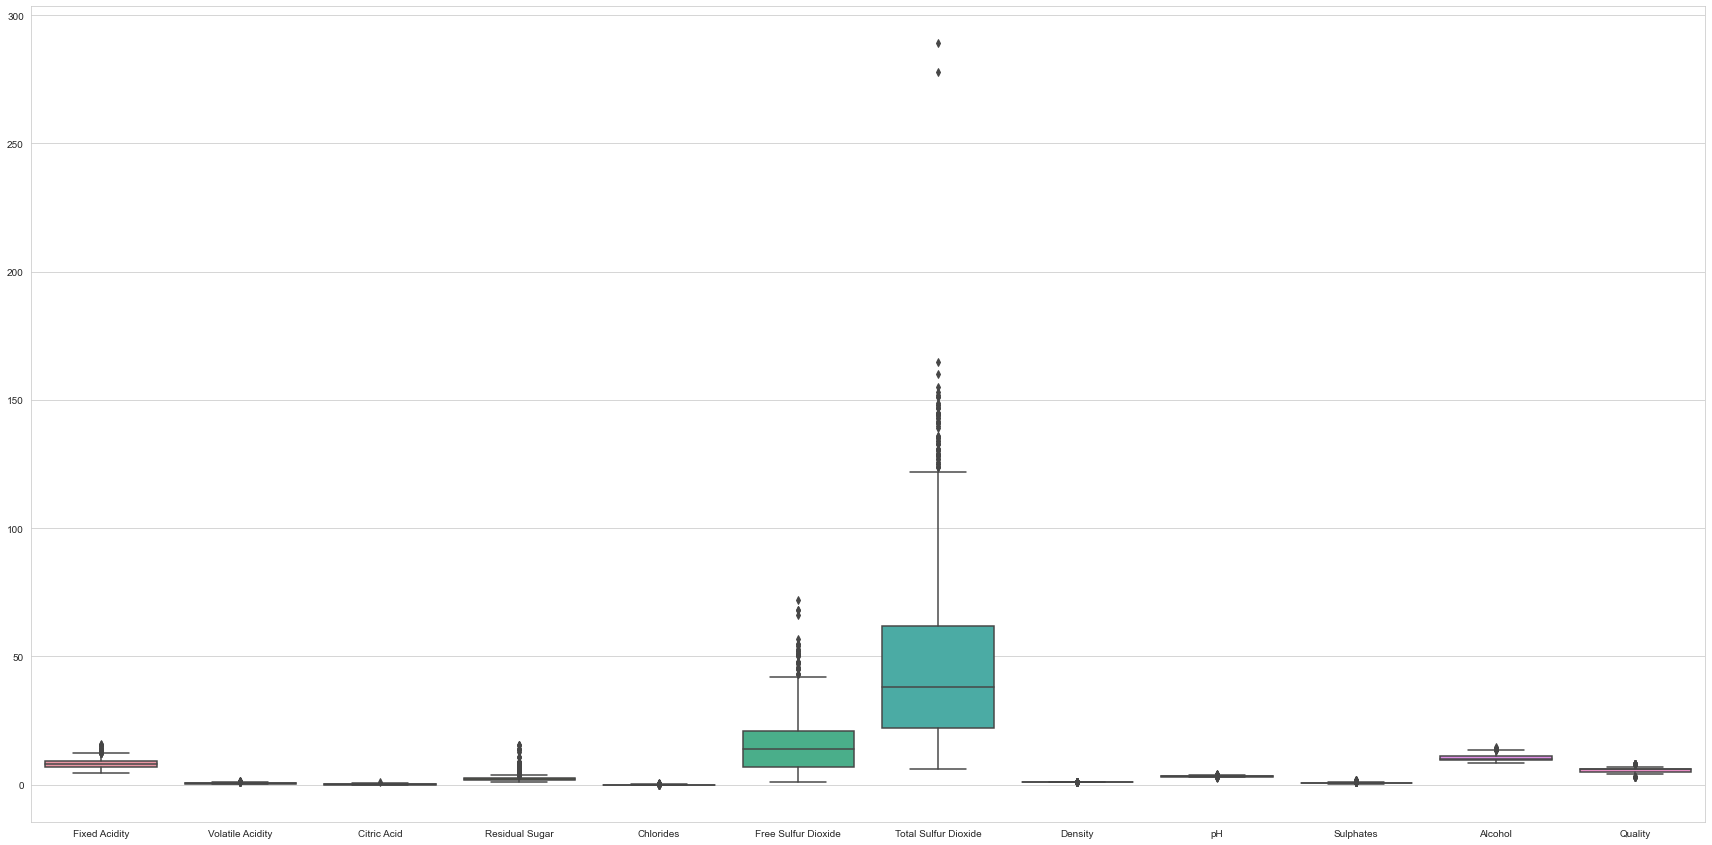

In [20]:
plt.figure(figsize=(30, 15))
sns.boxplot(data=df)

<AxesSubplot:>

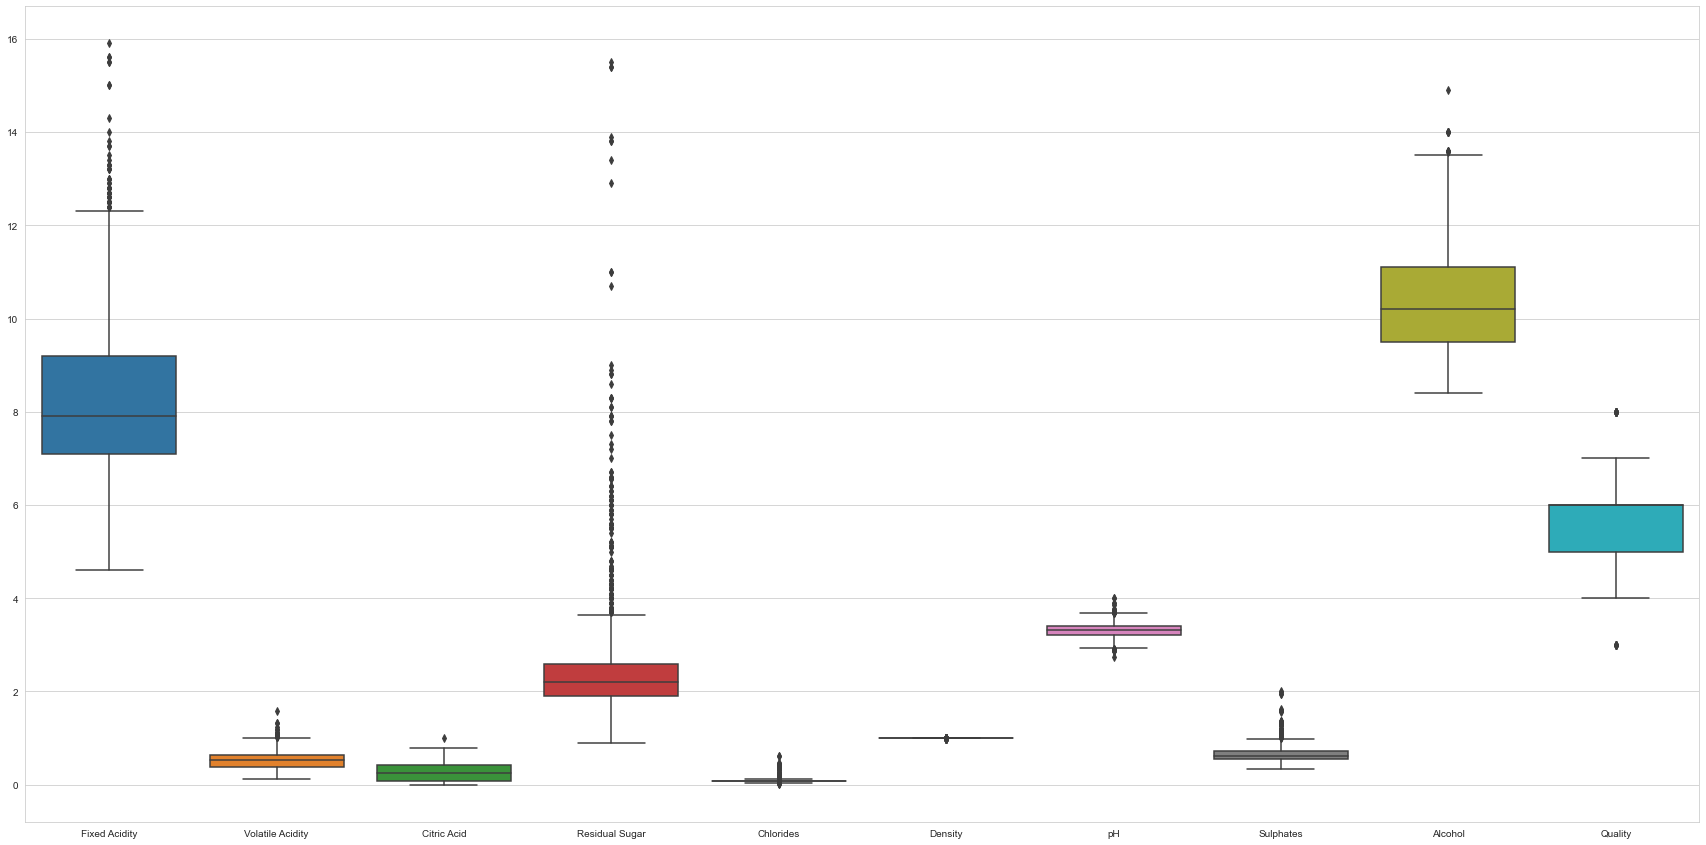

In [21]:
plt.figure(figsize=(30, 15))
zoom = df[['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']]
sns.boxplot(data=zoom)

<Figure size 2160x1080 with 0 Axes>

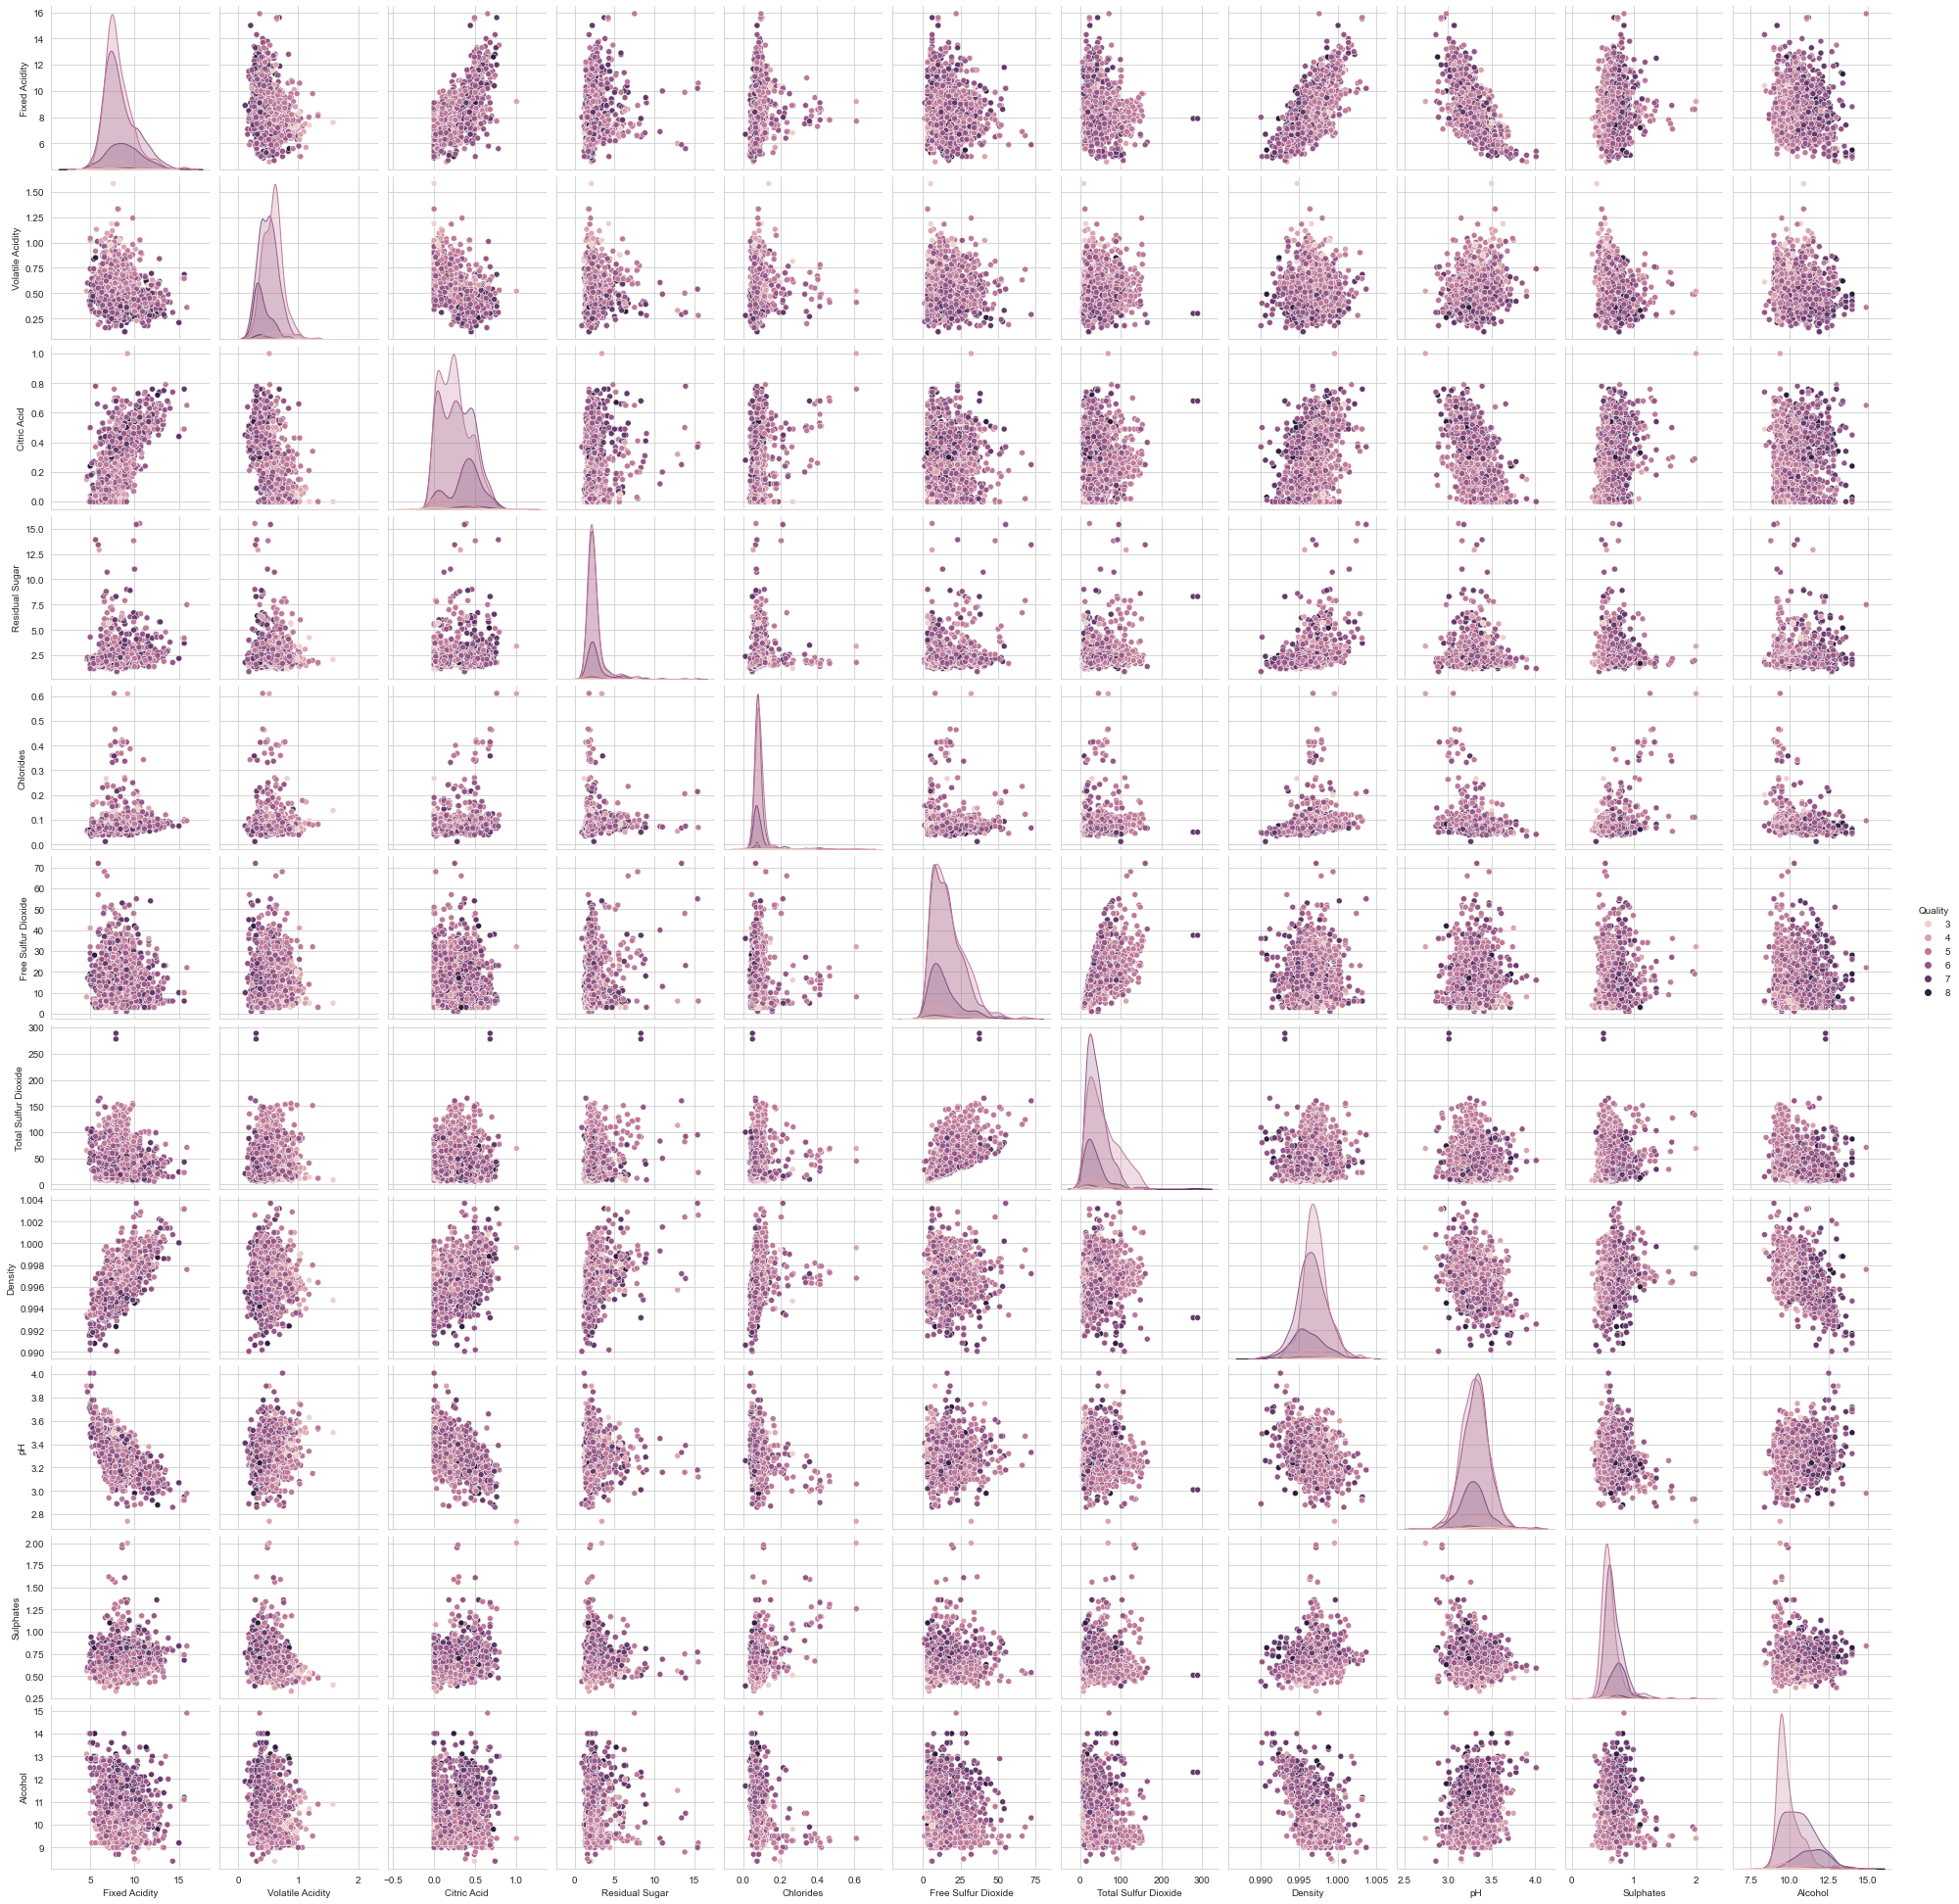

In [22]:
plt.figure(figsize=(30, 15))
sns.pairplot(data=df, hue='Quality')
plt.show()

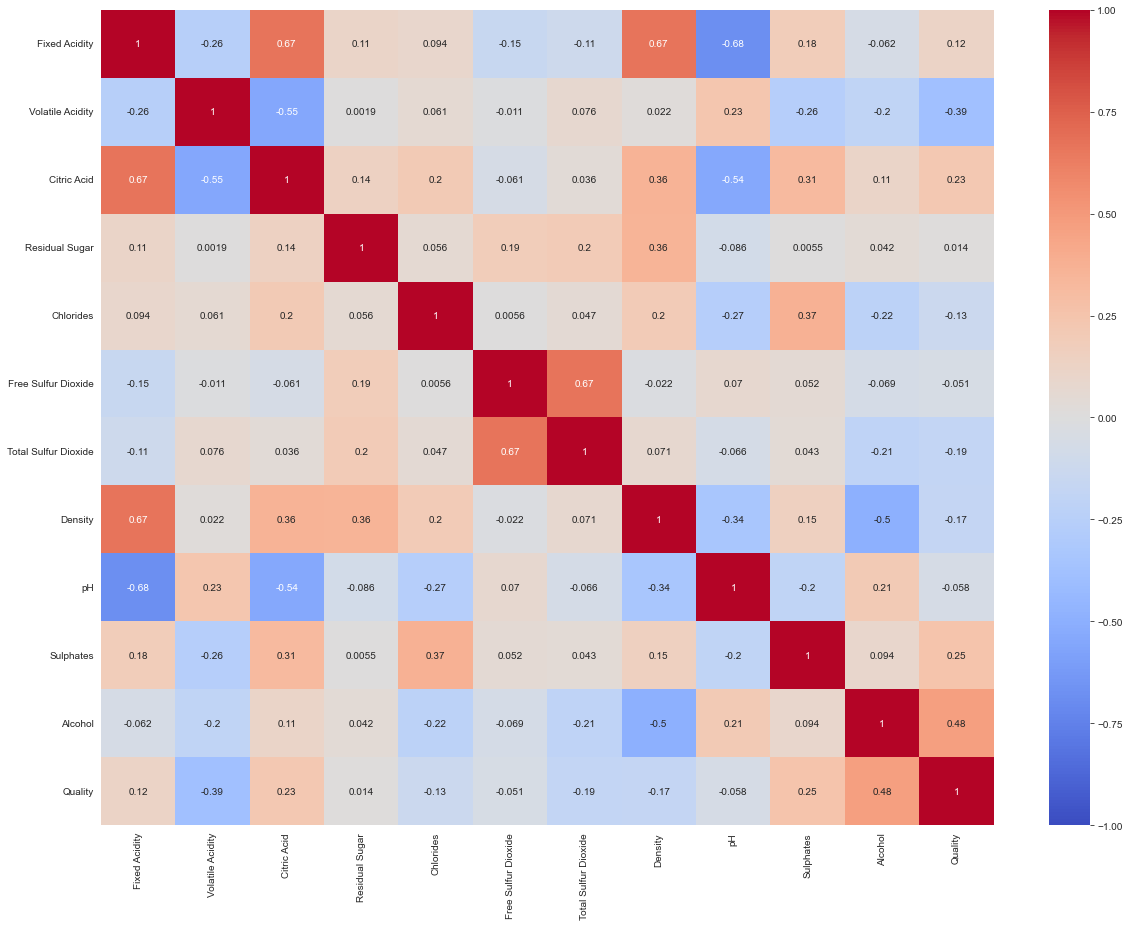

In [23]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

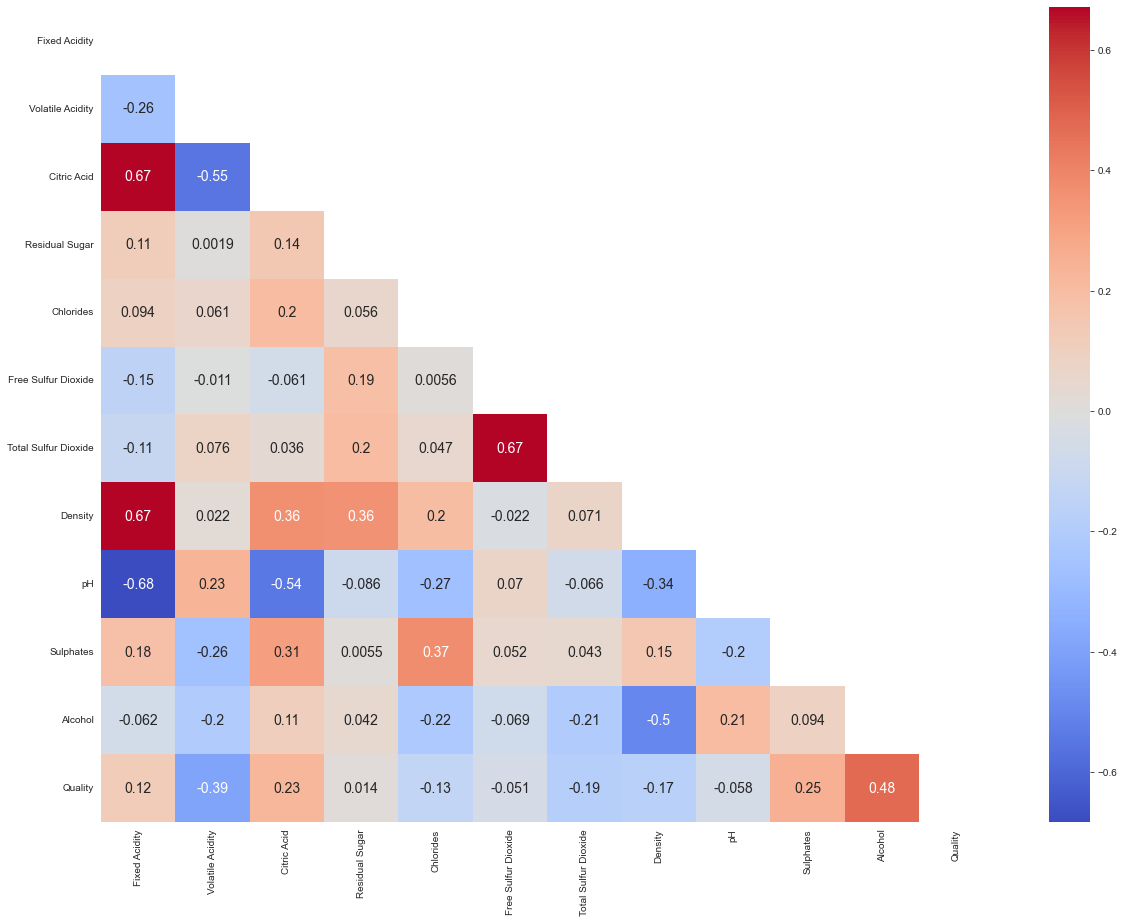

In [24]:
# Heatmap other display
# Creates an array of zeros
zero = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(zero)
zero[triangle_indices] = True
# Check the relationship between all the features with the target (Quality)
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), mask=zero, cmap="coolwarm", annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
# In order of highest correlation (to Quality): Alcohol, Volatile Acidity, Sulphates, Citric Acid, Total Sulfur Dioxide, Density, Chlorides, Fixed Acidity, pH, Free Sulfur Dioxide, Residual Sugar
     


In [25]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
regr = LinearRegression()
regr.fit(x_train, y_train)
     

LinearRegression()

In [27]:
print(regr.predict([[15, 0.01, 0, 5, 0.001, 30, 50, 0.95, 3, 0.9, 15]]))


[9.82988592]
